# Question 1 - Extracting Tesla Stock Data Using yfinance:

In [1]:
import yfinance as yf

# Create a Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Get historical stock data for Tesla
tesla_data = tesla.history(period="max")

# Reset the index and display the first five rows of the tesla_data dataframe
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2 - Extracting Tesla Revenue Data Using Webscraping:

In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Get Tesla revenue data using webscraping
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

# Find the correct table and convert it into a pandas dataframe
tesla_revenue = pd.read_html(str(tables[1]))[0]
tesla_revenue.tail()


,Tesla Quarterly Revenue(Millions of US $),Tesla Quarterly Revenue(Millions of US $).1
50,2010-06-30,$28
51,2010-03-31,$21
52,2009-12-31,NaN
53,2009-09-30,$46
54,2009-06-30,$27


# Question 3 - Extracting GameStop Stock Data Using yfinance:

In [3]:
# Create a Ticker object for GameStop
gme = yf.Ticker("GME")

# Get historical stock data for GameStop
gme_data = gme.history(period="max")

# Reset the index and display the first five rows of the gme_data dataframe
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Webscraping:

In [4]:
# Get GameStop revenue data using webscraping
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")

# Find the correct table and convert it into a pandas dataframe
gme_revenue = pd.read_html(str(tables[1]))[0]
gme_revenue.tail()


,GameStop Quarterly Revenue(Millions of US $),GameStop Quarterly Revenue(Millions of US $).1
52,2010-01-31,"$3,524"
53,2009-10-31,"$1,835"
54,2009-07-31,"$1,739"
55,2009-04-30,"$1,981"
56,2009-01-31,"$3,492"


# Question 5 - Tesla Stock and Revenue Dashboard:

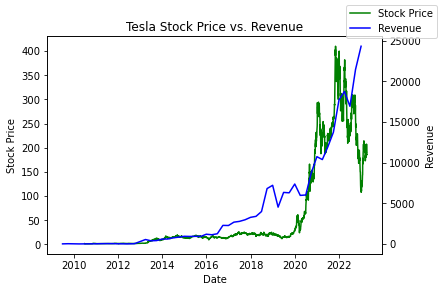

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Find the table with Tesla revenue data
tesla_revenue_table = soup.find_all("table", attrs={"class": "historical_data_table table"})[1]

# Extract the data from the table
tesla_revenue_data = []
for row in tesla_revenue_table.tbody.find_all("tr"):
    col = row.find_all("td")
    date = col[0].text.strip()
    revenue = col[1].text.strip()
    
    tesla_revenue_data.append({"Date": date, "Revenue": revenue})

# Create a DataFrame with the extracted data
tesla_revenue = pd.DataFrame(tesla_revenue_data)

# Convert the 'Date' column to datetime format
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Convert the 'Revenue' column to numeric format (in millions)
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'].str.replace(',', '', regex=True).str.replace('$', '', regex=True), errors='coerce')

# Drop rows with NaN in the 'Revenue' column
tesla_revenue.dropna(subset=['Revenue'], inplace=True)

# Define the make_graph function
def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots()
    ax1.plot(stock_data["Date"], stock_data["Close"], color='g', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price')
    ax1.set_title(stock + " Stock Price vs. Revenue")
    
    ax2 = ax1.twinx()
    ax2.plot(revenue_data.Date, revenue_data.Revenue, color='b', label='Revenue')
    ax2.set_ylabel('Revenue')
    fig.legend()
    plt.show()

# Call the make_graph function with the tesla_data and tesla_revenue DataFrames
make_graph(tesla_data, tesla_revenue, 'Tesla')


# Question 6 - GameStop Stock and Revenue Dashboard:

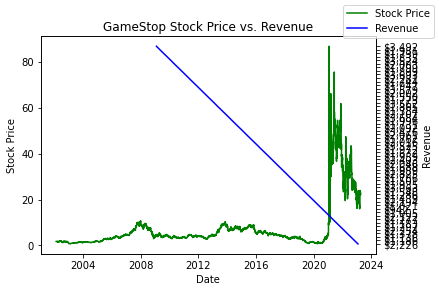

In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")
gme_revenue_table = tables[1]  # Assuming the revenue table is the second table on the page

gme_revenue_data = []

for row in gme_revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    date_col = cols[0].text.strip()
    revenue_col = cols[1].text.strip()
    gme_revenue_data.append([date_col, revenue_col])

gme_revenue = pd.DataFrame(gme_revenue_data, columns=["Date", "Revenue"])

# Now you can convert the 'Date' column to datetime format
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])


# Now you can call the make_graph function
make_graph(gme_data, gme_revenue, 'GameStop')
